In [2]:
import scipy.integrate as spi
from scipy.stats import gamma
from scipy.integrate import odeint
from array import *
from scipy.optimize import curve_fit
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from ipynb.fs.full.HSV_Dyn_Functions import GetIndParams
#from ipynb.fs.full.HSV_Dyn_Functions import Vir_Dyn
#from ipynb.fs.full.HSV_Dyn_Functions import Vir_Dyn_IS
#from ipynb.fs.full.HSV_Dyn_Functions import Vir_Dyn_DDD
#from ipynb.fs.full.HSV_Dyn_Functions import RunSimulation
#from ipynb.fs.full.HSV_Dyn_Functions import RunSimulation_DD
#from ipynb.fs.full.HSV_Dyn_Functions import Plotting
%matplotlib inline

In [6]:
Indparameters_file_withBurst = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/Vero/AveqPFU+PCR_nk=15_betasup=0_VSup0_VCell0data_delta_Regr_gammasFixed_ErrorParamFixed_NIburst/Assessment/AveqPFU+PCR_nk=15_betasup=0_VSup0_VCell0data_delta_Regr_gammasFixed_ErrorParamFixed_NIburst_005/Results/IndividualParameters/estimatedIndividualParameters.txt'
Indparameters_withBurst = pd.read_csv(Indparameters_file_withBurst)


#Indparameters_file_DDperI_betasup0_nk_15 = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/Vero/HSV_Regressor_AveqPCR_DDperI_V0_frmdata_nk=15_delta_est_betaSup=0/Assessment/HSV_Regressor_AveqPCR_DDperI_V0_frmdata_nk=15_delta_est_betaSup=0_001/Results/IndividualParameters/estimatedIndividualParameters.txt'

#Indparameters_DDperI15_betasup0 = pd.read_csv(Indparameters_file_DDperI_betasup0_nk_15)
print(Indparameters_withBurst)

Indparameters_file_nk_1_betaSup0 = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/N2A/HSV_Regressor_AVE_qPCR_N2A_deltaI=0_InitfrmData_nk=1_betaSup0/IndividualParameters/estimatedIndividualParameters.txt'


Indparameters_Lin01 = pd.read_csv(Indparameters_file_nk_1_betaSup0)

Popparameters_file_Vero = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/Vero/HSV_Regressor_AveqPCR_DDperI_V0_frmdata_nk=15_delta_est_betaSup=0/Assessment/HSV_Regressor_AveqPCR_DDperI_V0_frmdata_nk=15_delta_est_betaSup=0_001/Results/populationParameters.txt'
Popparameters_Vero = pd.read_csv(Popparameters_file_Vero)

Popparameters_file_n2a = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/N2A/HSV_Regressor_AVE_qPCR_N2A_deltaI=0_InitfrmData_nk=1_betaSup0/populationParameters.txt'
Popparameters_n2a = pd.read_csv(Popparameters_file_n2a)

     id  piCellI_SAEM  piCellNI_SAEM   DI_SAEM  DNI_SAEM  kappa_SAEM  \
0  High       20.8366       14782.80  0.004815  0.043186    1.003210   
1   Low       20.8235        4705.14  0.004832  0.043278    0.999366   

   KNI_SAEM  gammaI_SAEM  gammaNI_SAEM  VSupI0_SAEM  ...     DI_sd    DNI_sd  \
0   6.54636         0.04             0      3835.71  ...  0.000434  0.002188   
1   6.54347         0.04             0      3862.07  ...  0.000464  0.002204   

   kappa_sd    KNI_sd  gammaI_sd  gammaNI_sd  VSupI0_sd  betaCell_sd  \
0  0.007366  0.041343          0           0    319.133     0.082670   
1  0.007903  0.040996          0           0    329.121     0.077665   

     fNI_sd   Cat  
0  280.2380  3.00  
1   16.2394  0.01  

[2 rows x 46 columns]


In [8]:
n_vero = 15
k_vero_high = Indparameters_withBurst[Indparameters_withBurst.id == 'High'].kappa_mode[0]
k_vero_low = Indparameters_withBurst[Indparameters_withBurst.id == 'Low'].kappa_mode[1]

n_n2a = 1
k_n2a_high = Indparameters_Lin01[Indparameters_Lin01.id == 'High'].kappa_mode[0]
k_n2a_low = Indparameters_Lin01[Indparameters_Lin01.id == 'Low'].kappa_mode[1]

Text(0.5, 0, 'time (hrs)')

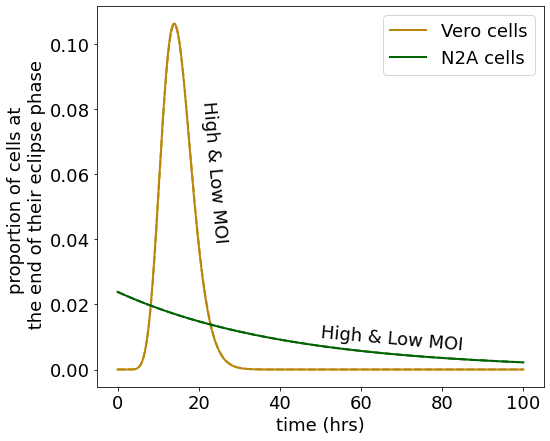

In [8]:
x = np.linspace(0, 100, 1000)
y1 = gamma.pdf(x, a=15, scale=1/k_vero_high)
y2 = gamma.pdf(x, a=15, scale=1/k_vero_low)
y3 = gamma.pdf(x, a=1, scale=1/k_n2a_high)
y4 = gamma.pdf(x, a=1, scale=1/k_n2a_low)

fig = plt.figure(figsize = (8,7))
plt.rcParams.update({'font.size': 18})
plt.plot(x, y1, label='Vero cells', color = 'darkgoldenrod', linewidth = 2)
plt.plot(x, y2, '--', color = 'darkgoldenrod', linewidth = 2)
plt.plot(x, y3, label='N2A cells', color = 'darkgreen', linewidth = 2)
plt.plot(x, y4, '--', color = 'darkgreen', linewidth = 2)
#plt.text(13, 0.1, 'High MOI', rotation = 95)
plt.text(20, 0.04, 'High & Low MOI', rotation = -85)
plt.text(50, 0.006, 'High & Low MOI', rotation = -5)

#plt.plot(5/0.21*np.ones(50), np.linspace(-0.005,0.15,50), 'k--', label = 'mean')
#plt.plot(1/0.0031*np.ones(50), np.linspace(-0.005,0.15,50), 'k--', label = 'mean')
plt.legend()

plt.ylabel('proportion of cells at \n the end of their eclipse phase')
plt.xlabel('time (hrs)')
#plt.savefig('Figures/gammadist.svg')

In [19]:
def GetIndParams(Indparameters, ID, style = 'mode'):
    ''' 
    input:
        - data frame with parameter values as columns, individuals as rows
        - ID identifying individual of interest
        - style = 'mode' or 'mean' or 'SAEM' depending on which parameter values are preferred
    return:
        - dictionary with parameter names as key and parameter values as values
    '''
    i = ID
    cols = list(Indparameters)
    pid_params = Indparameters[Indparameters.id == i]
  #  print(pid_params)
    values = []
    keys = []
    for c in cols:
        if style in c:
            k = c.split('_')[0]
            keys.append(k)
            v = pid_params[c].values[0]
            values.append(v)
        for i,(v,k) in enumerate(zip(values, keys)):
            if 'log10' in k:
                values[i] = 10**v
                keys[i] = k.split('0')[1]
    if 'alpha' in keys:
        i = keys.index('alpha')
        j = keys.index('kPL')
        values[j] = values[j]*dose**values[i]

    params = dict(zip(keys, values))
    return params

In [20]:
def RunSimulation_DDperI(Vir_Dyn, Data, Indparameters, param_order, id, C_Tot, nk, N, Vcell0, Vsup0):
    Params_dict = GetIndParams(Indparameters, id, style = 'mode')
    params = []
    for k in param_order:
        params.append(Params_dict[k])
    params.append(nk)
    print(params)
    MOI = Data[Data.ID == id].MOI.unique()[0]
    Init = C_Tot*np.exp(-MOI), C_Tot*(1-np.exp(-MOI))
    for i in range(1,nk):
        Init = np.append(Init, 0)
    Init = np.append(Init, [0.0, Vcell0, Vsup0])
    Init = np.append(Init, 0)
    #print(Init)
    t = np.linspace(0, max(Data.time), N)
    y = spi.odeint(Vir_Dyn, Init, t, args = tuple(params))  
    return y.T

In [21]:
def Vir_Dyn_DDD_perI_betasup0(y,t, betaCell, piCell, D, k, deltaI, gamma, K, nk):
    dY = np.zeros(nk+5);
    E = np.zeros(nk)
    S = y[0]
    for i in range(1, nk+1):
        E[i-1] = y[i]
    I = y[nk+1]
    V_Cell = y[nk+2]
    V_Sup = y[nk+3]
    Dead = y[nk+4]
    dY[0] = -betaCell*V_Cell*S
    dY[1] = betaCell*V_Cell*S - k*E[0]
    for i in range(2, nk+1):
        dY[i] = k*(E[i-2]-E[i-1])
    dY[nk+1] = k*E[nk-1]-deltaI*I
    dY[nk+2] = piCell*I - (D*(V_Cell)/(V_Cell+K*I))*V_Cell
    dY[nk+3] = (D*(V_Cell)/(V_Cell+K*I))*V_Cell - gamma*V_Sup
    dY[nk+4] = deltaI*I
    
    
    return dY

In [22]:
data_file_N2A = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Projects/Data/Marius Data/qPCR_Time_course_N2A.csv'

data_file_Vero = r'/Users/sesmaeil/Library/CloudStorage/OneDrive-FredHutchinsonCancerResearchCenter/HSV cell culture kinetics/Data/Marius Data/TimeCourseAverPCR_Vero.csv'

Data_N2A = pd.read_csv(data_file_N2A)
IDs_N2A = Data_N2A.ID.unique()

Data_Vero = pd.read_csv(data_file_Vero)

IDs_Vero = Data_Vero.ID.unique()

In [23]:
param_order = ['betaCell', 'piCell', 'D', 'kappa', 'deltaI', 'gamma', 'K']
C_Tot = 300000
nk = 15
N = 10000 #timesteps
#i = 1
E_DDperI15_betasup0 = np.zeros((len(IDs_Vero),nk, N))
for id, idi in zip(IDs_Vero, range(0,len(IDs_Vero))):
    
    Vcell0 = float(Data_Vero[(Data_Vero.ID == id) & 
                                 (Data_Vero.time == 1) & 
                                 (Data_Vero.ObsID == 'Cell')].Aver_qPCR)

    Vsup0 = float(Data_Vero[(Data_Vero.ID == id) & 
                                 (Data_Vero.time == 1) & 
                                 (Data_Vero.ObsID == 'Sup')].Aver_qPCR)
    y = RunSimulation_DDperI(Vir_Dyn_DDD_perI_betasup0, Data_Vero, Indparameters_DDperI15_betasup0, param_order, id, C_Tot, nk, N, 
                             Vcell0, Vsup0)

    if id == IDs_Vero[0]:
        S_DDperI15_betasup0 = y[0,:]
        for i in range(1, nk+1):
            E_DDperI15_betasup0[idi,i-1,:] = y[i,:]
        I_DDperI15_betasup0 = y[nk+1,:]
        V_Cell_DDperI15_betasup0 = y[nk+2,:]
        V_Sup_DDperI15_betasup0 = y[nk+3,:]
        Dead_DDperI15_betasup0 = y[nk+4, :]
        
    else:
        S_DDperI15_betasup0 = np.vstack((S_DDperI15_betasup0,y[0,:]))
        for i in range(1, nk+1):
            E_DDperI15_betasup0[idi,i-1,:] = y[i,:]
        I_DDperI15_betasup0 = np.vstack((I_DDperI15_betasup0,y[nk+1,:]))
        V_Cell_DDperI15_betasup0 = np.vstack((V_Cell_DDperI15_betasup0,y[nk+2,:]))
        V_Sup_DDperI15_betasup0 = np.vstack((V_Sup_DDperI15_betasup0,y[nk+3,:]))
        Dead_DDperI15_betasup0 = np.vstack((Dead_DDperI15_betasup0, y[nk+4, :]))

[6.829674408079633e-08, 5351.37, 0.0527285, 1.36921, 0.287996, 0.04, 2217634.6564851, 15]
[6.811927232143532e-08, 5338.3, 0.0524011, 0.816633, 0.0727365, 0.04, 2288811.3582847575, 15]


In [24]:
pi_Vero = Indparameters_DDperI15_betasup0.piCell_mode
pi_n2a = Indparameters_Lin01.piCell_mode

pi = [pi_Vero, pi_n2a]

Pop_pi_Vero = Popparameters_Vero[Popparameters_Vero.parameter=='piCell_pop'].value[0]
Pop_pi_n2a = Popparameters_n2a[Popparameters_n2a.parameter=='piCell_pop'].value[0]

Pop_pi = [Pop_pi_Vero, Pop_pi_n2a]


(10, 10000)

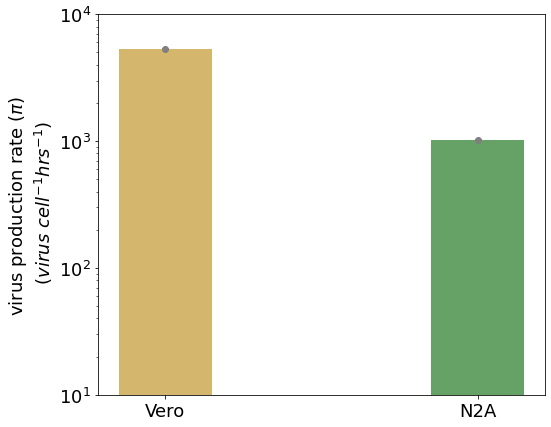

In [25]:
color = ['darkgoldenrod', 'darkgreen']
fig = plt.figure(figsize = (8,7))
plt.rcParams.update({'font.size': 18})
plt.plot(['Vero', 'N2A'], [pi[0][0], pi[1][0]], '*',  label = 'High MOI', color = 'grey')
plt.plot(['Vero', 'N2A'], [pi[0][1], pi[1][1]], 'o',  label = 'Low MOI', color = 'grey')
#plt.legend()
plt.bar(['Vero', 'N2A'], Pop_pi, width = 0.3, log= True, alpha = 0.6, color = color)
plt.ylabel('virus production rate ($\pi$) \n ($virus$ $cell^{-1}$$hrs^{-1}$)')
plt.ylim([10, 10000])

In [26]:
D_Vero = Indparameters_DDperI15_betasup0.D_mode
D_n2a = Indparameters_Lin01.D_mode
K_Vero = Indparameters_DDperI15_betasup0.log10K_mode

EgressVero_High = D_Vero[0]*V_Cell_DDperI15_betasup0[0,:]/(V_Cell_DDperI15_betasup0[0,:]+np.power(10,K_Vero[0])*I_DDperI15_betasup0[0,:])
EgressVero_Low = D_Vero[1]*V_Cell_DDperI15_betasup0[1,:]/(V_Cell_DDperI15_betasup0[1,:]+np.power(10,K_Vero[1])*I_DDperI15_betasup0[1,:])


([<matplotlib.axis.XTick at 0x7f9480b3e520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

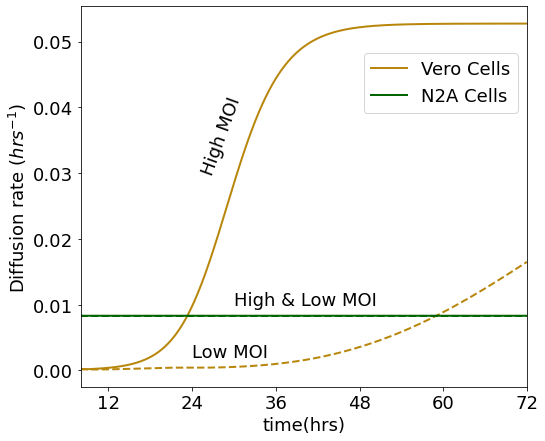

In [34]:
t = np.linspace(0, max(Data_Vero.time), N)
fig = plt.figure(figsize = (8,7))
plt.rcParams.update({'font.size': 18})
plt.plot(t, EgressVero_High, linewidth = 2,color = color[0], label = 'Vero Cells')
plt.plot(t, EgressVero_Low,  '--', linewidth = 2,color = color[0])

plt.plot(t, D_n2a[0]*np.ones(len(t)), label = 'N2A Cells', linewidth = 2,color = color[1])
plt.plot(t, D_n2a[1]*np.ones(len(t)),  '--', linewidth = 2,color = color[1])
plt.text(24,0.002, 'Low MOI')
plt.text(25,0.03, 'High MOI', rotation = 70)
plt.text(30,0.01, 'High & Low MOI')
plt.legend(bbox_to_anchor=(1, 0.9))
plt.ylabel('Diffusion rate ($hrs^{-1}$)')
plt.xlabel('time(hrs)')
plt.xlim([8,72])
plt.xticks(np.linspace(12,72,6))

In [ ]:
D_n2a = Indparameters_Lin01.D_mode
D_DD_n2a = 
K_n2a = 

Egressn2a = D_n2a*V_Cell_DDperI15_betasup0[0,:]/(V_Cell_DDperI15_betasup0[0,:]+np.power(10,K_Vero[0])*I_DDperI15_betasup0[0,:])
